* https://rabadan.c2b2.columbia.edu/html/randomly/tutorial.html#refs

In [ ]:
!pip install randomly

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp36-cp36m-linux_x86_64.whl size=68503 sha256=208a555a143ac409903b5b059d4eaeb11a2ee11d162a1b3af0ebdd6098f7f764
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [ ]:
import randomly

In [ ]:
import pandas as pd
df=pd.read_table('/content/drive/My Drive/Colab Notebooks/example.txt', index_col=0)

In [ ]:
df.head()

,A1BG,A1CF,A2M,A4GALT,AAAS,AACS,AACSP1,AADAC,AADACL2,AADACP1,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZRANB3,ZRSR1,ZRSR2,ZSCAN1,ZSCAN12,ZSCAN12P1,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,2,0,13,0,0,0,2,0,1,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,2,0,0,1
3,0,0,0,0,0,1,0,1,0,0,1,0,0,2,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 17287 entries, A1BG to pk
dtypes: int64(17287)
memory usage: 192.4 MB


In [ ]:
model = randomly.Rm()

In [ ]:
model.preprocess(df, min_tp=0, 
                            min_genes_per_cell=0, 
                            min_cells_per_gene=0,
                        refined=True)

Run the refining function


In [ ]:
model.refining(min_trans_per_gene=7)

1459  cells and  11389  genes


## Modeling the data using Random Matrix Theory

In [ ]:
model.fit()

Preprocessed data is being used for fitting


* 1416個の固有値はノイズ

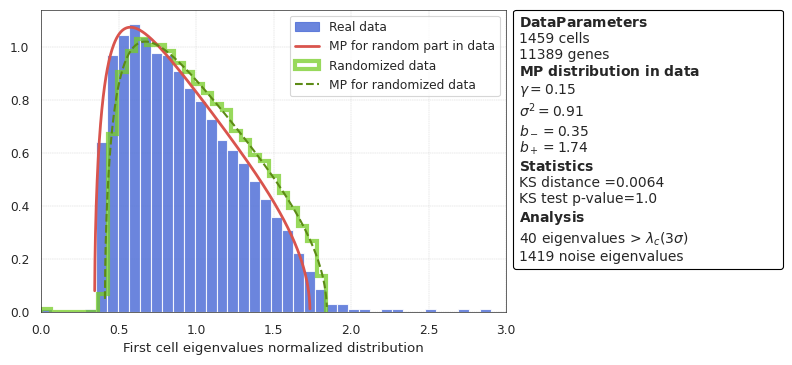

In [ ]:
model.plot_mp()

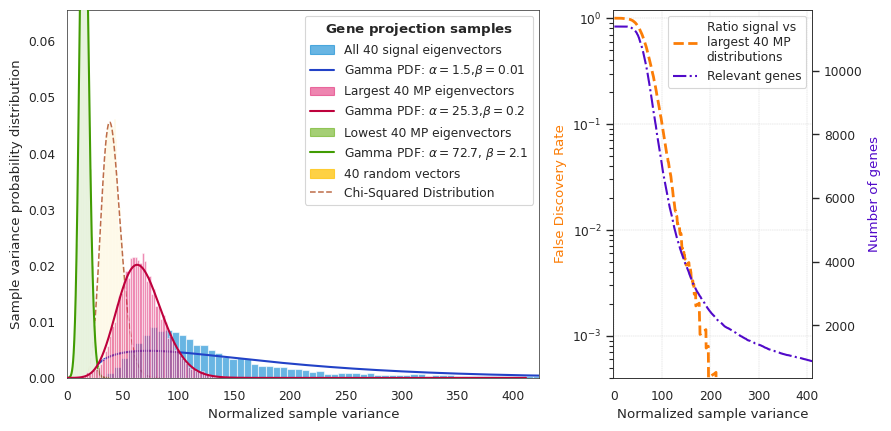

In [ ]:
model.plot_statistics()

* 偽発見率 false discovery rate / 偽陽性

In [ ]:
df2 = model.return_cleaned(fdr=0.0001)
df2.shape

(1459, 2213)

In [ ]:
df2 = model.return_cleaned(sample_variance=350)
df2.shape

(1459, 1104)

In [ ]:
df2 = model.return_cleaned(sample_variance=350, path='/content/drive/My Drive/Colab Notebooks/example.txt')

In [ ]:
model.fit_tsne(sample_variance=350)

computing t-SNE, using Multicore t-SNE for 2 jobs
atribute embedding is updated with t-SNE coordinates


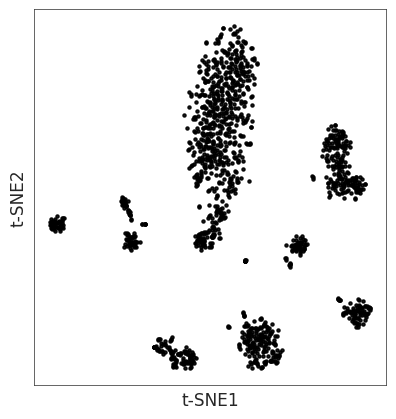

In [ ]:
model.plot()

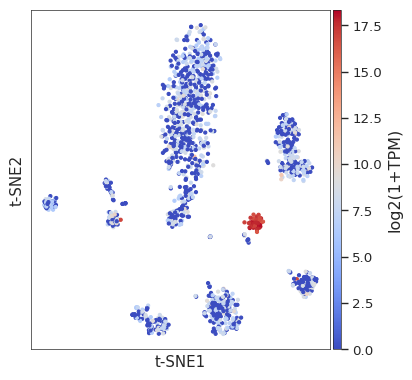

In [ ]:
model.plot(gene=['PPY'], size=4)

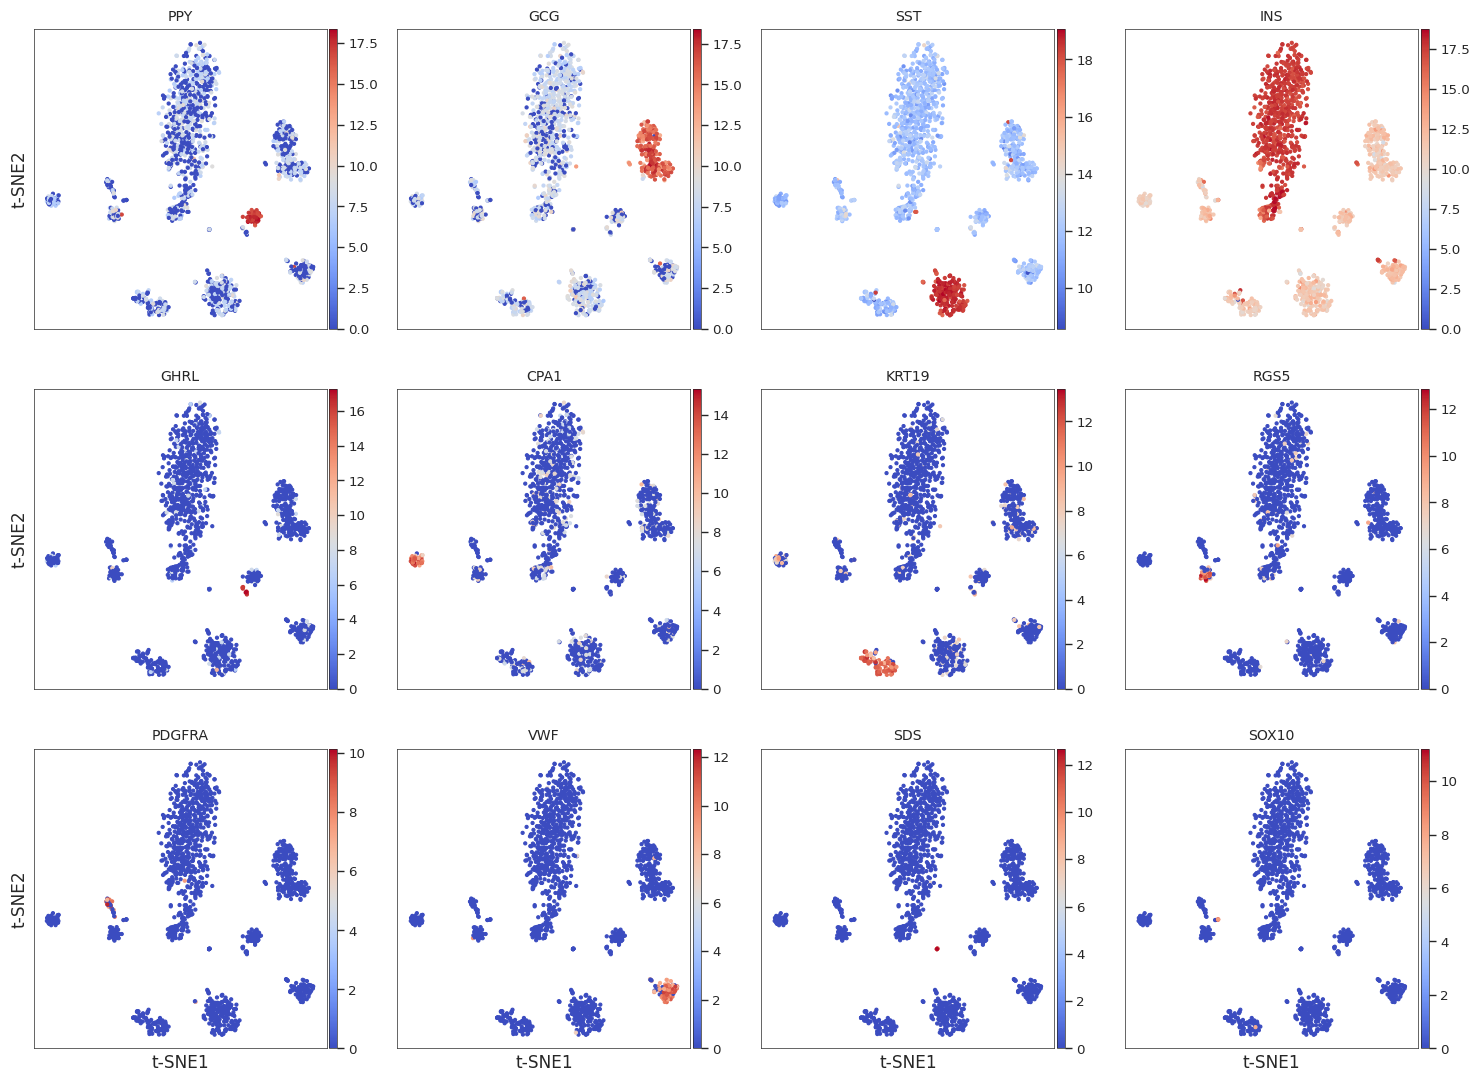

In [ ]:
model.plot(gene=('PPY','GCG','SST','INS','GHRL','CPA1','KRT19'
                                    ,'RGS5','PDGFRA','VWF','SDS','SOX10'))